# **How to stack machine learning models in Python**

Medical Insurance Dataset
Exploring Demographic and Medical Factors in Insurance Costs

# **Load dataset**

In [55]:
# !pip install xgboost


Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 13.1 MB/s eta 0:00:0000:0100:01


In [56]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRFRegressor

In [57]:

df = pd.read_csv('insurance.csv')
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [58]:
print(df.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [61]:
columns_to_encode = ['sex', 'smoker', 'region']
for column in columns_to_encode:
    df[column] = pd.factorize(df[column])[0]
    
print(df)


      age  sex     bmi  children  smoker  region      charges
0      19    0  27.900         0       0       0  16884.92400
1      18    1  33.770         1       1       1   1725.55230
2      28    1  33.000         3       1       1   4449.46200
3      33    1  22.705         0       1       2  21984.47061
4      32    1  28.880         0       1       2   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    1  30.970         3       1       2  10600.54830
1334   18    0  31.920         0       1       3   2205.98080
1335   18    0  36.850         0       1       1   1629.83350
1336   21    0  25.800         0       1       0   2007.94500
1337   61    0  29.070         0       0       2  29141.36030

[1338 rows x 7 columns]


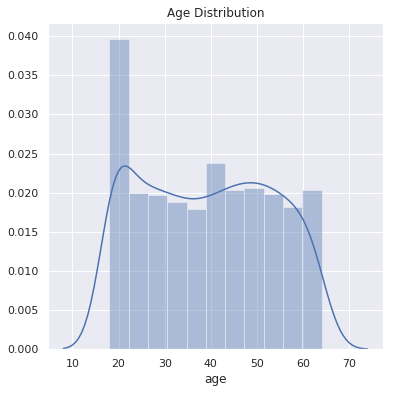

In [68]:
sn.set()
plt.figure(figsize=(6,6))
sn.distplot(df['age'])
plt.title('Age Distribution')
plt.show()

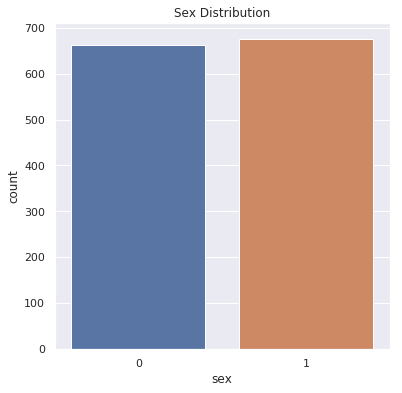

In [69]:
# Gender distribution
plt.figure(figsize=(6,6))
sn.countplot(x='sex', data=df)
plt.title('Sex Distribution')
plt.show()

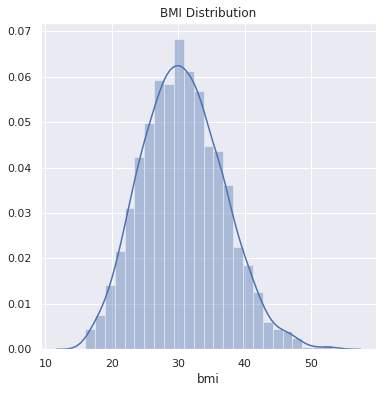

In [71]:
# bmi distribution
plt.figure(figsize=(6,6))
sn.distplot(df['bmi'])
plt.title('BMI Distribution')
plt.show()

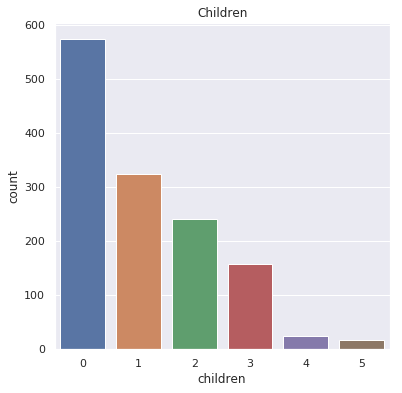

In [72]:
# distribution for the number of children 
plt.figure(figsize=(6,6))
sn.countplot(x='children', data=df)
plt.title('Children')
plt.show()

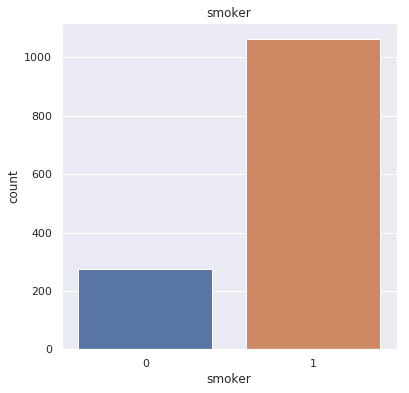

In [73]:
#distribution for the smoke data

plt.figure(figsize=(6,6))
sn.countplot(x='smoker', data=df)
plt.title('smoker')
plt.show()

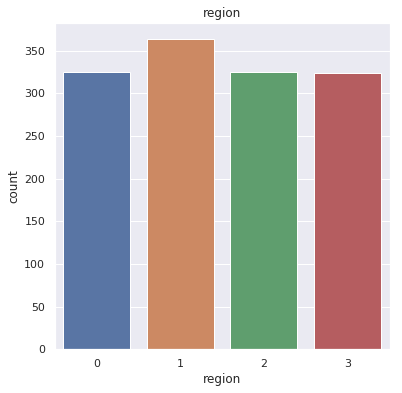

In [74]:
# region column
plt.figure(figsize=(6,6))
sn.countplot(x='region', data=df)
plt.title('region')
plt.show()

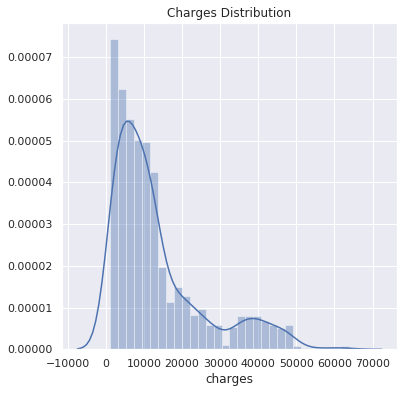

In [75]:
# distribution of charges value
plt.figure(figsize=(6,6))
sn.distplot(df['charges'])
plt.title('Charges Distribution')
plt.show()

In [76]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
print(X.head())


   age  sex     bmi  children  smoker  region
0   19    0  27.900         0       0       0
1   18    1  33.770         1       1       1
2   28    1  33.000         3       1       1
3   33    1  22.705         0       1       2
4   32    1  28.880         0       1       2


In [77]:
# Data splitting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42  
)
print(X_train.shape, X_test.shape,y_train.shape, y_test.shape)

(1070, 6) (268, 6) (1070,) (268,)


In [45]:
X_train.shape, X_test.shape

((1070, 6), (268, 6))

# **Build Regression models**

In [91]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [92]:
RF_model=RandomForestRegressor(n_estimators=10)
RF_model.fit(X_train_scaled,y_train)
y_pred=RF_model.predict(X_train_scaled)
RF_train_r2=metrics.r2_score(y_train,y_pred)

RF_train_r2



0.9686240825999168

In [93]:
y1_pred=RF_model.predict(X_test_scaled)
RF_test_r2=metrics.r2_score(y_test,y1_pred)

RF_test_r2

0.8565424675871613

In [94]:
XG_model=XGBRFRegressor()
XG_model.fit(X_train_scaled,y_train)
z_pred=XG_model.predict(X_train_scaled)
XG_train_r2=metrics.r2_score(y_train,z_pred)

XG_train_r2

0.9015149605205685

In [97]:
z1_pred=XG_model.predict(X_test_scaled)
XG_test_r2=metrics.r2_score(y_test,z1_pred)

XG_test_r2

0.8776984254089713

In [95]:
DT_model=DecisionTreeRegressor()
DT_model.fit(X_train_scaled,y_train)
q_pred=DT_model.predict(X_train_scaled)
DT_train_r2=metrics.r2_score(y_train,q_pred)

DT_train_r2

0.9983078124756305

In [96]:
q1_pred=DT_model.predict(X_test_scaled)
DT_test_r2=metrics.r2_score(y_test,q1_pred)

DT_test_r2

0.7055616583017229

# **Build Stacked model**

In [100]:
# Define estimators
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

estimator_list = [
    ('RF_model',RF_model),
    ('DT_model',DT_model),
    ('XG_model',XG_model) ]

# Build stack model
stack_model = StackingRegressor(
    estimators=estimator_list, final_estimator=LinearRegression()
)

# Train stacked model
stack_model.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred = stack_model.predict(X_train_scaled)
y_test_pred = stack_model.predict(X_test_scaled)

# Training set model performance
stack_model_train_r2 = metrics.r2_score(y_train, y_train_pred) 
# Test set model performance
stack_model_test_r2 = metrics.r2_score(y_test, y_test_pred) 

print('Model performance for Training set')
print('-  R-squared: %.3f' % stack_model_train_r2)
print('----------------------------------')
print('Model performance for Test set')

print('- R-squared: %.3f' % stack_model_test_r2)



Model performance for Training set
-  R-squared: 0.888
----------------------------------
Model performance for Test set
- R-squared: 0.879


# **Results**

In [101]:
r2_train_list = {'RF':RF_train_r2,
'XG': XG_train_r2,
'DT': DT_train_r2,
'stack': stack_model_train_r2}

r2_test_list = {'RF':RF_test_r2,
'XG': XG_test_r2,
'DT': DT_test_r2,
'stack': stack_model_test_r2}

In [103]:
import pandas as pd

r2_train_df = pd.DataFrame.from_dict(r2_train_list, orient='index', columns=['R2-Training set'])
r2_test_df = pd.DataFrame.from_dict(r2_test_list, orient='index', columns=['R2-Test set'])
df2 = pd.concat([r2_train_df, r2_test_df], axis=1)
df2

,R2-Training set,R2-Test set
RF,0.968624,0.856542
XG,0.901515,0.877698
DT,0.998308,0.705562
stack,0.887503,0.879017
